In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import data
df = pd.read_csv("medical_examination.csv")

In [3]:
# Add 'overweight' column
df['overweight'] = np.where((df['weight'])/(((df['height'])/100)**2) > 25,1,0)

In [4]:
df['cholesterol'] = np.where(df['cholesterol'] == 1, 0, 1)
df['gluc'] = np.where(df['gluc'] == 1, 0, 1)

In [5]:
df_cat = pd.melt(df,id_vars='cardio', value_vars=['active','alco','cholesterol','gluc','overweight','smoke'])

In [6]:
df_cat

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
...,...,...,...
419995,0,smoke,1
419996,1,smoke,0
419997,1,smoke,0
419998,1,smoke,0


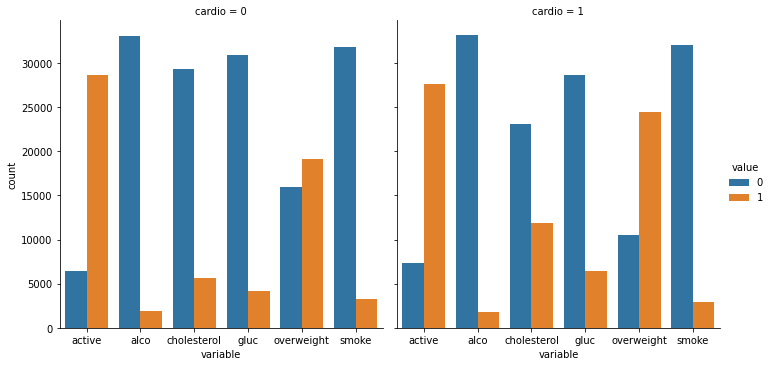

In [8]:
sns.catplot(data=df_cat,kind='count',x='variable',hue='value',col='cardio')

In [14]:
df_heat = df[
    (df['ap_lo'] <= df['ap_hi']) & 
    (df['height'] >= (df['height'].quantile(0.025))) &
    (df['height'] <= (df['height'].quantile(0.975))) &
    (df['weight'] >= (df['weight'].quantile(0.025))) &
    (df['weight'] <= (df['weight'].quantile(0.975)))
    ]

In [15]:
corr = df_heat.corr()

In [17]:
mask = np.triu(corr)

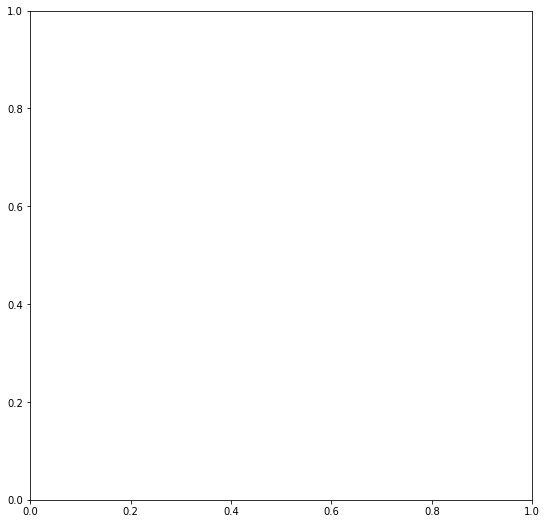

In [18]:
fig, ax = plt.subplots(figsize=(9,9))

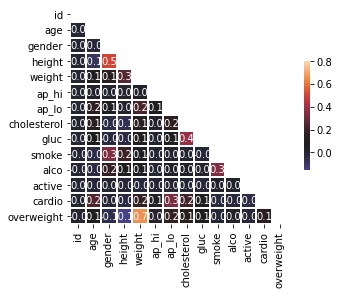

In [21]:
fig = sns.heatmap(corr,annot=True, fmt='.1f', linewidths=1, mask=mask, vmax=.8, center=0.09,square=True, cbar_kws = {'shrink':0.5})

In [22]:
fig

<AxesSubplot:>